Loading the dataset

In [1]:
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\Avocado\\avocado.csv',
                      usecols=[2]).values.astype('float32')


def delta_time_series(data):
    return data[1:] - data[:-1]

dataset = delta_time_series(dataset)

dataset.shape


def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('Avg. Price')
    plt.show()

plot_delta(dataset)

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

In [2]:
# Helper function to get y as a numpy array from the TimeseriesGenerator
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y



In [3]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [4]:
# split into train and test sets

train, val, test = dataset[0:12000, :], dataset[12001:13000, :], dataset[13001:None, :]

lookback = 84
step = 2
batch_size = 128

train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,shuffle=True,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (13000 - 12001 - lookback)
test_steps = (len(dataset) - 13001 - lookback)

Epoch 1/10
500/500 [==============================] - 26s 53ms/step - loss: 0.0472 - val_loss: 0.0697
Epoch 2/10
500/500 [==============================] - 26s 51ms/step - loss: 0.0399 - val_loss: 0.0537
Epoch 3/10
500/500 [==============================] - 26s 51ms/step - loss: 0.0394 - val_loss: 0.0725
Epoch 4/10
500/500 [==============================] - 25s 49ms/step - loss: 0.0394 - val_loss: 0.0609
Epoch 5/10
500/500 [==============================] - 25s 50ms/step - loss: 0.0391 - val_loss: 0.0451
Epoch 6/10
500/500 [==============================] - 25s 50ms/step - loss: 0.0388 - val_loss: 0.0415
Epoch 7/10
500/500 [==============================] - 25s 50ms/step - loss: 0.0389 - val_loss: 0.0842
Epoch 8/10
500/500 [==============================] - 25s 49ms/step - loss: 0.0388 - val_loss: 0.0899
Epoch 9/10
500/500 [==============================] - 25s 50ms/step - loss: 0.0388 - val_loss: 0.0675
Epoch 10/10
500/500 [==============================] - 25s 50ms/step - loss: 0.038

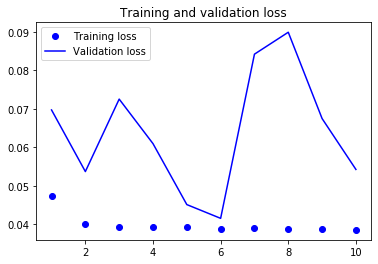

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/20
500/500 [==============================] - 26s 52ms/step - loss: 0.0461 - val_loss: 0.0693
Epoch 2/20
500/500 [==============================] - 25s 50ms/step - loss: 0.0403 - val_loss: 0.0530
Epoch 3/20
500/500 [==============================] - 24s 49ms/step - loss: 0.0396 - val_loss: 0.0726
Epoch 4/20
500/500 [==============================] - 24s 49ms/step - loss: 0.0392 - val_loss: 0.0602
Epoch 5/20
500/500 [==============================] - 24s 49ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 6/20
500/500 [==============================] - 25s 49ms/step - loss: 0.0389 - val_loss: 0.0396
Epoch 7/20
500/500 [==============================] - 24s 49ms/step - loss: 0.0390 - val_loss: 0.0837
Epoch 8/20
500/500 [==============================] - 25s 49ms/step - loss: 0.0387 - val_loss: 0.0896
Epoch 9/20
500/500 [==============================] - 25s 49ms/step - loss: 0.0388 - val_loss: 0.0669
Epoch 10/20
500/500 [==============================] - 25s 49ms/step - loss: 0.038

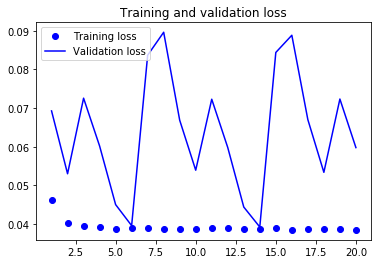

In [6]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen, steps_per_epoch=500, epochs=20,
validation_data=val_data_gen,
validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/40
500/500 [==============================] - 25s 50ms/step - loss: 0.0532 - val_loss: 0.0707
Epoch 2/40
500/500 [==============================] - 25s 51ms/step - loss: 0.0398 - val_loss: 0.0535
Epoch 3/40
500/500 [==============================] - 25s 51ms/step - loss: 0.0393 - val_loss: 0.0733
Epoch 4/40
500/500 [==============================] - 25s 51ms/step - loss: 0.0394 - val_loss: 0.0598
Epoch 5/40
500/500 [==============================] - 25s 51ms/step - loss: 0.0391 - val_loss: 0.0443
Epoch 6/40
500/500 [==============================] - 26s 51ms/step - loss: 0.0391 - val_loss: 0.0403
Epoch 7/40
500/500 [==============================] - 25s 50ms/step - loss: 0.0388 - val_loss: 0.0826
Epoch 8/40
500/500 [==============================] - 25s 50ms/step - loss: 0.0385 - val_loss: 0.0925
Epoch 9/40
500/500 [==============================] - 25s 50ms/step - loss: 0.0388 - val_loss: 0.0670
Epoch 10/40
500/500 [==============================] - 25s 50ms/step - loss: 0.038

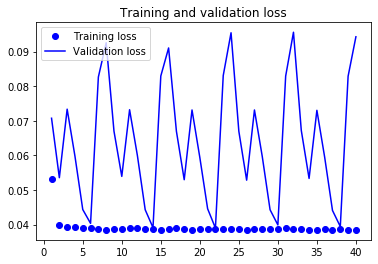

In [7]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2,input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen,steps_per_epoch=500,epochs=40,validation_data=val_data_gen,
validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/40
500/500 [==============================] - 54s 109ms/step - loss: 2970183.1122 - val_loss: 0.1487
Epoch 2/40
500/500 [==============================] - 60s 120ms/step - loss: 0.0424 - val_loss: 0.0610
Epoch 3/40
500/500 [==============================] - 60s 120ms/step - loss: 0.0386 - val_loss: 0.0766
Epoch 4/40
500/500 [==============================] - 59s 118ms/step - loss: 0.0381 - val_loss: 0.0617
Epoch 5/40
500/500 [==============================] - 59s 118ms/step - loss: 0.0384 - val_loss: 0.0466
Epoch 6/40
500/500 [==============================] - 59s 117ms/step - loss: 0.0384 - val_loss: 0.0400
Epoch 7/40
500/500 [==============================] - 59s 117ms/step - loss: 0.0383 - val_loss: 0.0838
Epoch 8/40
500/500 [==============================] - 59s 118ms/step - loss: 0.0386 - val_loss: 0.0930
Epoch 9/40
500/500 [==============================] - 56s 113ms/step - loss: 0.0384 - val_loss: 0.0673
Epoch 10/40
500/500 [==============================] - 52s 104ms/st

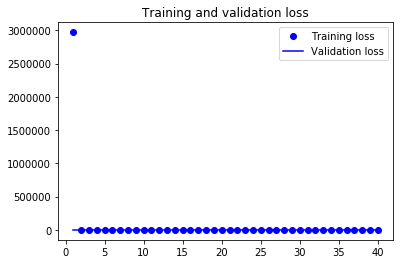

In [8]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5,return_sequences=True,
input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen,steps_per_epoch=500,epochs=40,validation_data=val_data_gen,validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
test_loss = model.evaluate_generator(test_data_gen,steps=test_steps)
print('test loss:', test_loss)

test loss: 0.04021497815847397


In [10]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(5163, 1)

In [11]:
testPredict = scaler.inverse_transform(testPredict)

In [12]:
testY = get_y_from_generator(test_data_gen)

(5163, 1)


In [13]:
testY = scaler.inverse_transform(testY)

In [14]:
from sklearn.metrics import mean_squared_error
import math
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.22 RMSE


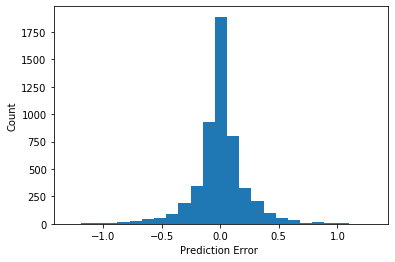

In [15]:
# error distribution
error = testPredict - testY
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ")
_ = plt.ylabel("Count")

The results interpretation :
To prevent a model from learning misleading or irrelevant patterns found in the training data, the best solution is to get more training data.
A model trained on more data will naturally generalize better.
A lower validation loss signals a better model.
It’s evident from the training and validation curves that the model is overfitting:the training and validation losses start to diverge considerably after a few epochs.
To use dropout with recurrent networks, you should use a time-constant dropout mask and recurrent dropout mask. These are built into Keras recurrent layers, so all you have to do is use the dropout and recurrent_dropout arguments of recurrent layers.
When you have data where temporal ordering matters, recurrent networks are a great fit and easily outperform models that first flatten the temporal data.


    
    